In [1]:
cd ..

/home/hyunjun/workspace/FactorSearch (mom)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
algo = 'RL'

seed = 1
pf = pd.read_csv(f'result/seed{seed}/PF_{algo}.csv', index_col=0)
pv = pd.read_csv(f'result/seed{seed}/PV_{algo}.csv', index_col=0)
po = pd.read_csv(f'result/seed{seed}/PO_{algo}.csv', index_col=0)
ti = pd.read_csv(f'result/seed{seed}/TI_{algo}.csv', index_col=0, dtype=str)
me = pd.read_csv(f'result/seed{seed}/Me_{algo}.csv', index_col=0)
we = pd.read_csv(f'result/seed{seed}/We_{algo}.csv', index_col=0)

np.set_printoptions(suppress=True)
we.values

array([[0.01851548, 0.0034967 , 0.09285565, 0.0003009 , 0.63701034,
        0.00027842, 0.05753545, 0.18501629, 0.00101766, 0.00397314]])

In [272]:
kospi_ = pd.read_csv('data1/kospi.csv', index_col=0)['2015':'2024']
dates = kospi_.index
kospi = kospi_.values

pv_path = lambda algo, seed: f'result/seed{seed}/PV_{algo}.csv'
me_path = lambda algo, seed: f'result/seed{seed}/Me_{algo}.csv'
we_path = lambda algo, seed: f'result/seed{seed}/We_{algo}.csv'

pv_random = [pd.read_csv(pv_path('random', seed), index_col=0).values.reshape(-1,1) for seed in range(1, 6)]
re_random = [pd.read_csv(me_path('random', seed), index_col=0).values.reshape(-1,1) for seed in range(1, 6)]
we_random = [pd.read_csv(we_path('random', seed), index_col=0) for seed in range(1, 6)]

pv_rl = [pd.read_csv(pv_path('RL', seed), index_col=0) for seed in range(1, 6)]
re_rl = [pd.read_csv(me_path('RL', seed), index_col=0) for seed in range(1, 6)]
we_rl = [pd.read_csv(we_path('RL', seed), index_col=0) for seed in range(1, 6)]

pv_mean_ran = np.mean(np.concatenate(pv_random, axis=-1), axis=-1)
pv_std_ran = np.std(np.concatenate(pv_random, axis=-1), axis=-1)
pv_mean_rl = np.mean(np.concatenate(pv_rl, axis=-1), axis=-1)
pv_std_rl = np.std(np.concatenate(pv_rl, axis=-1), axis=-1)

In [273]:
def get_alpha(pv):
    free = 0.04 / 12
    pv = np.array(pv).reshape(-1)
    R_i = (pv[1:] / pv[:-1]) - 1
    R_f = (kospi[1:] / kospi[:-1]) - 1
    R_f = R_f.reshape(-1)
    alpha = np.polyfit(R_f-free, R_i-free, 1)[-1]
    return alpha.reshape(1,-1)

In [274]:
sharpe_random = np.concatenate(re_random, axis=-1)[0] 
rankic_random = np.concatenate(re_random, axis=-1)[1] 
mdd_random = np.concatenate(re_random, axis=-1)[2] 
alpha_random = np.concatenate(list(map(get_alpha, pv_random)), -1)

sharpe_rl = np.concatenate(re_rl, axis=-1)[0] 
rankic_rl = np.concatenate(re_rl, axis=-1)[1] 
mdd_rl = np.concatenate(re_rl, axis=-1)[2] 
alpha_rl = np.concatenate(list(map(get_alpha, pv_rl)), -1)

print(f'Random search Sharpe: {sharpe_random} \n')
print(f'Random search RankIC: {rankic_random} \n')
print(f'Random search MDD: {mdd_random} \n')
print(f'Random search Alpha: {alpha_random} \n')

print(f'RL search Sharpe: {sharpe_rl} \n')
print(f'RL search RankIC: {rankic_rl} \n')
print(f'RL search MDD: {mdd_rl} \n')
print(f'RL search Alpha: {alpha_rl} \n')

Random search Sharpe: [0.1393 0.1961 0.2956 0.3966 0.5355] 

Random search RankIC: [0.1622 0.1506 0.1615 0.174  0.1622] 

Random search MDD: [36.8659 26.6274 31.3424 31.183  31.834 ] 

Random search Alpha: [[0.00685961 0.0089282  0.01211524 0.01706793 0.02084351]] 

RL search Sharpe: [0.413  0.3463 0.4436 0.4586 0.3481] 

RL search RankIC: [0.1679 0.1637 0.1605 0.1633 0.165 ] 

RL search MDD: [33.5934 38.2659 30.9794 30.7987 38.2604] 

RL search Alpha: [[0.01745126 0.01655744 0.01809693 0.01817099 0.01661127]] 



In [347]:
def show_plot(seed='all'):
    linewidth = 2.5
    timesteps = [8*i for i in range(14)]

    sns.set(style='darkgrid')
    plt.figure(figsize=(25, 6))
    plt.rc('legend', fontsize=20)
    plt.xticks(timesteps, dates[timesteps], weight='bold', fontsize=13.5)
    plt.yticks(weight='bold', fontsize=13.5)
    plt.ylabel('Porftolio Value', weight='bold', fontsize=20)

    if seed == 'all':
        plt.plot(pv_mean_rl, color="C4", linewidth=linewidth, label='Felector search')
        plt.plot(pv_mean_ran, color="C7", linewidth=linewidth, label='Random search')

        plt.fill_between(x=np.arange(pv_mean_rl.shape[0]), 
                        y1=pv_mean_rl + 0.5*pv_std_rl, 
                        y2=pv_mean_rl - 0.5*pv_std_rl, 
                        alpha=0.3, color="C4")
        
        plt.fill_between(x=np.arange(pv_mean_ran.shape[0]), 
                        y1=pv_mean_ran + 0.5*pv_std_ran, 
                        y2=pv_mean_ran - 0.5*pv_std_ran, 
                        alpha=0.3, color="C7")

    else:
        plt.plot(pv_rl[seed-1], color="C4", linewidth=linewidth, label='Felector search')
        plt.plot(pv_random[seed-1], color="C7", linewidth=linewidth, label='Random search')

    plt.title('Test Dataset Backtesting', weight='bold', fontsize=20)
    plt.legend()
    plt.show()


def show_bar(seed):

    pvrl = pd.DataFrame(pv_rl[seed-1])
    pvra = pd.DataFrame(pv_random[seed-1])

    pvrl.index = dates
    pvra.index = dates

    first_rl = pvrl.groupby(by=pd.to_datetime(dates).year).first()
    last_rl = pvrl.groupby(by=pd.to_datetime(dates).year).last()

    first_ra = pvra.groupby(by=pd.to_datetime(dates).year).first()
    last_ra = pvra.groupby(by=pd.to_datetime(dates).year).last()

    year_rl = (last_rl-first_rl) / first_rl
    year_ra = (last_ra-first_ra) / first_ra

    w = 0.5
    plt.figure(figsize=(10,5))
    plt.rc('legend', fontsize=20)

    plt.xticks(ticks=np.arange(1,9)+0.15/2, labels=[str(i) for i in range(2016, 2024)], weight='bold', fontsize=13.5)
    plt.yticks(weight='bold', fontsize=13.5)
    plt.ylabel('Porftolio Value', weight='bold', fontsize=20)

    plt.bar(x=np.arange(1,9), height=year_rl['0'].values[1:], width=w, color='C4')
    plt.bar(x=np.arange(1,9)+0.15, height=year_ra[0].values[1:], width=w, color='C7')
    plt.title(f'Yearly Portfolio Return: Seed {seed}', weight='bold', fontsize=20)

    plt.show()

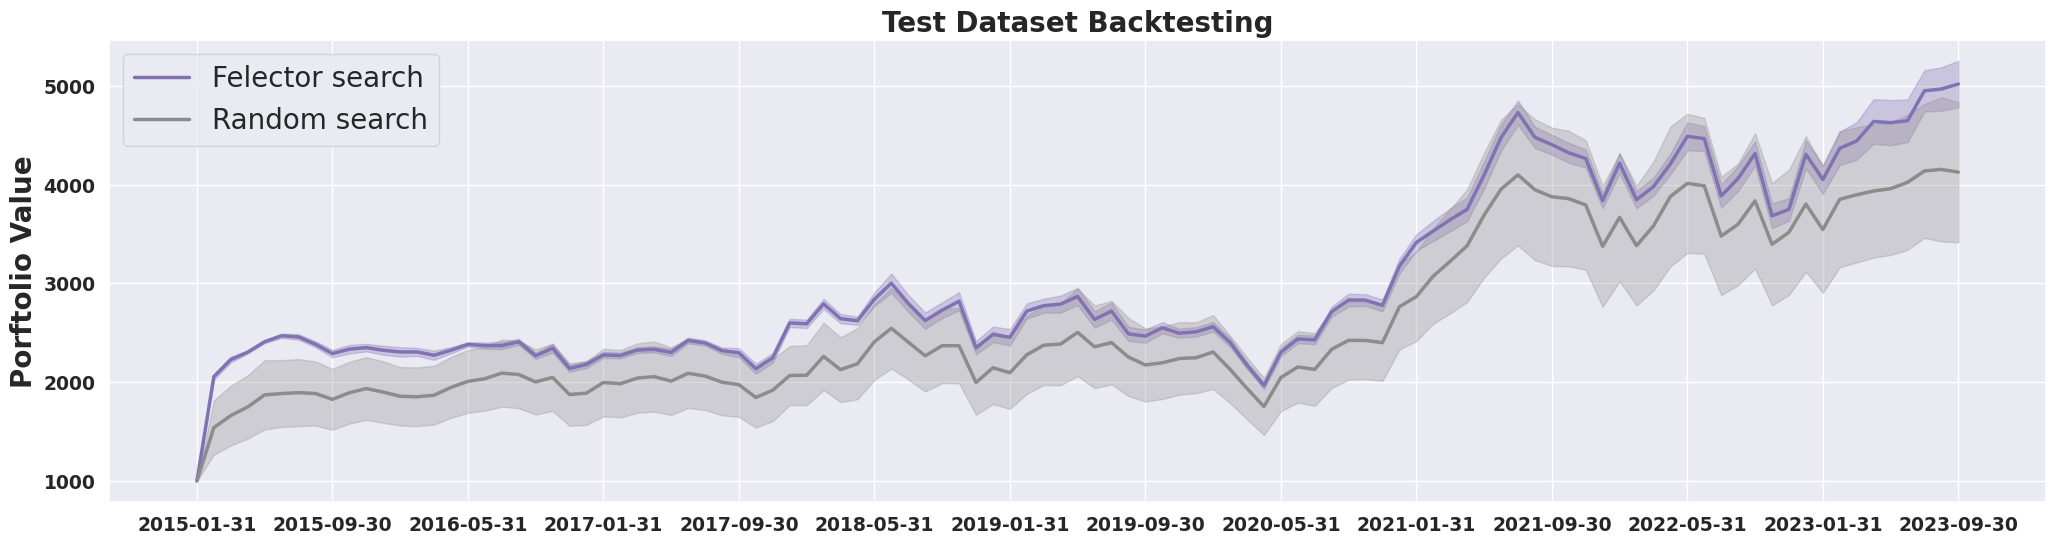

In [354]:
show_plot()

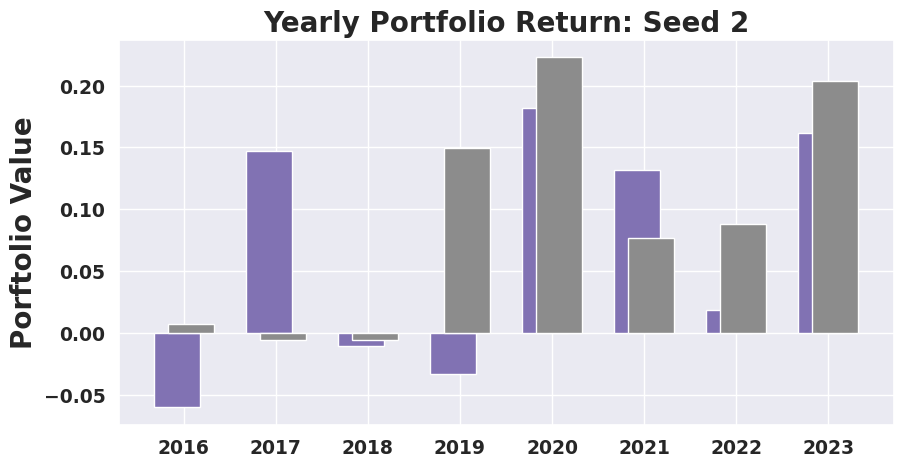

In [346]:
show_bar(2)

In [351]:
index = 0

print(np.mean((pv_rl[index].values[1:] - pv_rl[index].values[:-1]) / (pv_rl[index].values[:-1])))
print(np.std((pv_rl[index].values[1:] - pv_rl[index].values[:-1]) / (pv_rl[index].values[:-1])))

0.02073656424839761
0.11574202184565138


In [352]:
we_rl[index].values

array([[0.00013623, 0.05410853, 0.00008748, 0.00000214, 0.00000006,
        0.5168947 , 0.00000653, 0.363675  , 0.06455164, 0.00053772]])

In [ ]:
from agent import RANDOMSEARCH

all = ['1M', '3M', '6M', '9M', '12M', 
       '12_1M', '12_3M', '12_6M', 
       '12_9M', 'Kratio']

M1 = []
M3 = []
M6 = []
M9 = []
M12 = []
M12_1 = []
M12_3 = []
M12_6 = []
M12_9 = []
KRATIO = []

config = {'Number': 10, 
          'Quantile': 1,
          'Balance': 1000,
          'Quarter': '1Q',
          'Factors': all,
          'Dim': 10}

for factor in all:
    
    print(factor)
    for i in range(1, 6):
        config['Quantile'] = i
        config['Factors'] = [factor]

        randomsearch = RANDOMSEARCH(config)
        randomsearch.init()
        PVs, PFs, TIs, POs, result = randomsearch.test('2001','2016')
        print(result['sharpe'])

        if factor == '1M':
            M1.append(PVs)

        if factor == '3M':
            M3.append(PVs)

        if factor == '6M':
            M6.append(PVs)

        if factor == '9M':
            M9.append(PVs)

        if factor == '12M':
            M12.append(PVs)

        if factor == '12_1M':
            M12_1.append(PVs)

        if factor == '12_3M':
            M12_3.append(PVs)

        if factor == '12_6M':
            M12_6.append(PVs)

        if factor == '12_9M':
            M12_9.append(PVs)

        if factor == 'Kratio':
            KRATIO.append(PVs)

In [ ]:
dicts = {'1M':M1, '3M':M3, '6M':M6, '9M':M9, 
         '12M':M12, '12_1M':M12_1, '12_3M':M12_3, 
         '12_6M':M12_6, '12_9M':M12_9, 'Kratio':KRATIO}


for factor in all:
    sns.set(style='darkgrid')
    plt.figure(figsize=(18, 6))

    for i in [0, 1, 2, 3, 4]:
        plt.plot(np.log(dicts[factor][i]), label=f'{factor}-{i+1}')
        plt.legend()
        plt.title(f'Factor {factor}')

    plt.show()